# Tugas Lab 1 Pengolahan Citra

Ghifari Aulia Azhar Riza - 1906306773

In [1]:
from skimage import util, color, io, exposure, filters, morphology
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Soal 1
### a. [5] Tampilkan histogram citra tersebut dengan range intensitas 0 - 255

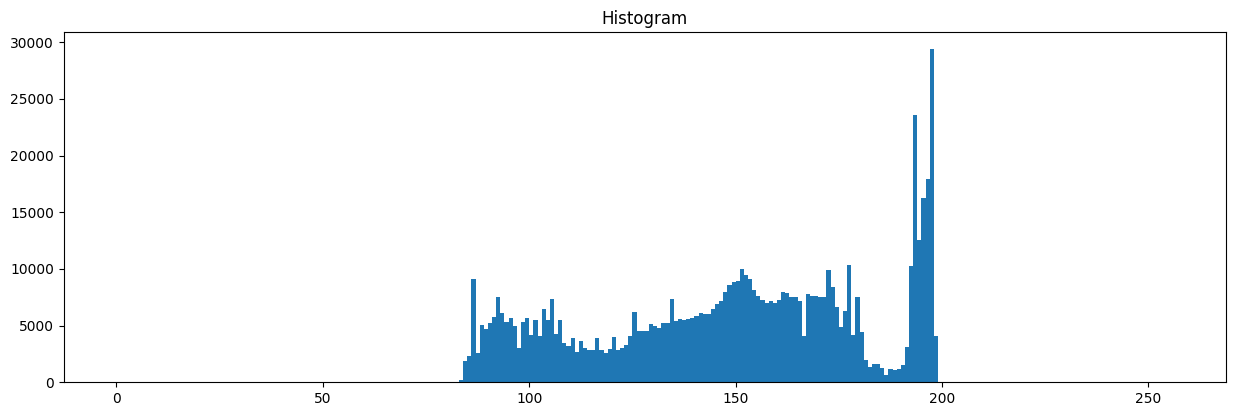

In [2]:
# 1a
mask = io.imread("mask.jpg")
plt.figure(figsize=(15,10))

mask_flat = util.img_as_ubyte(mask).flatten()
plt.subplot(2,1,1)
plt.hist(mask_flat, 256, range=(0,256))
plt.title('Histogram')
plt.show()

### b. [10] Lakukan histogram equalization terhadap citra tersebut kemudian tampilkan histogramnya

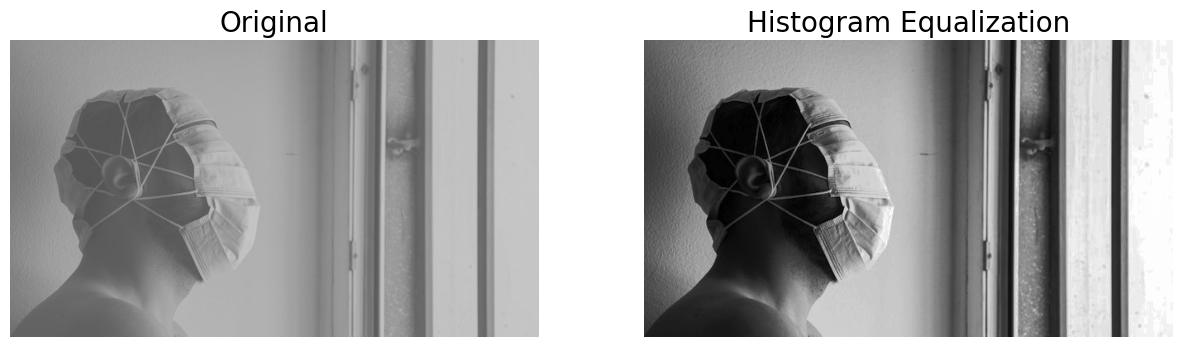

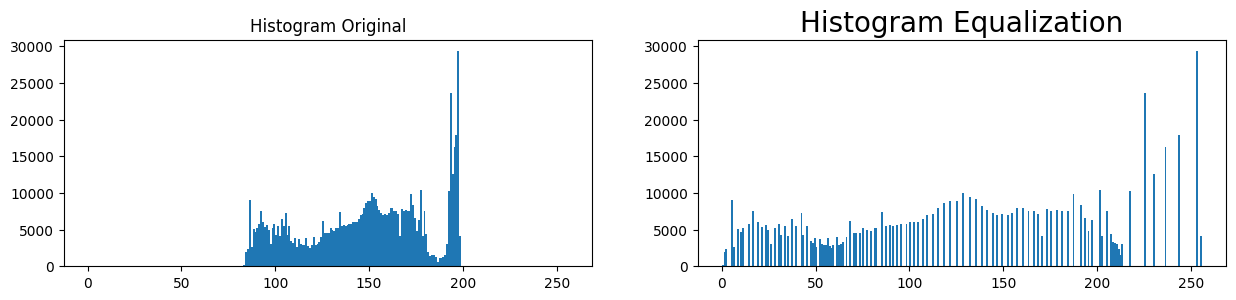

In [3]:
# 1b
mask_eq = exposure.equalize_hist(mask)
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(mask)
plt.title("Original", fontsize=20)
plt.axis('off')

plt.subplot(1,2,2); plt.imshow(mask_eq)
plt.title('Histogram Equalization', fontsize=20)
plt.axis("off")
plt.show()

plt.figure(figsize=(15,10))
mask_flat = util.img_as_ubyte(mask).flatten()
plt.subplot(3,2,1)
plt.hist(mask_flat, 256, range=(0,256))
plt.title('Histogram Original')

mask_eq_flat = util.img_as_ubyte(mask_eq).flatten()
plt.subplot(3,2,2)
plt.hist(mask_eq_flat, 256, range=(0,256))
plt.title('Histogram Equalization', fontsize=20)
plt.show()


### c. [10] Lakukan contrast stretching terhadap citra asli kemudian tampilkan histogramnya.

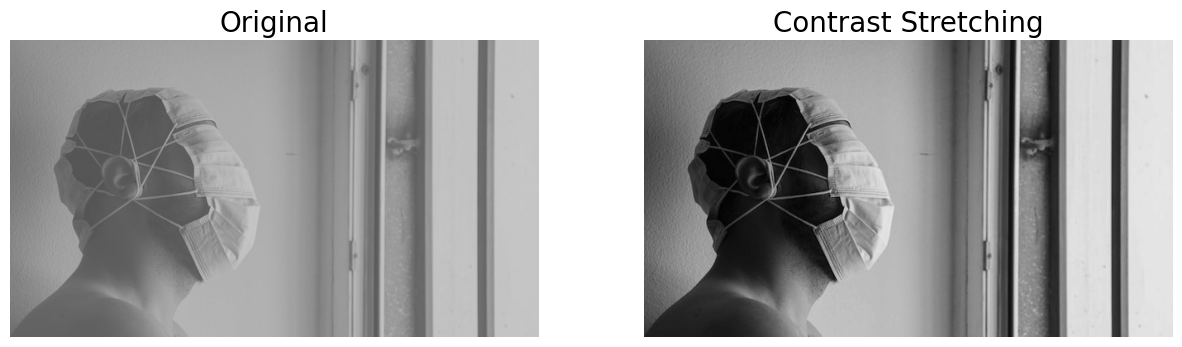

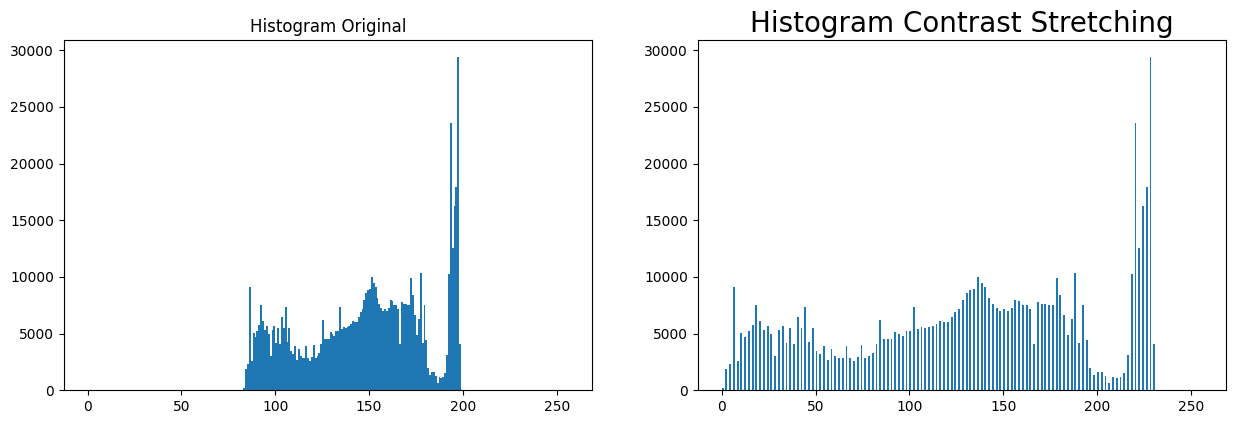

In [4]:
# 1c
plt.figure(figsize=(15,10))

mn = min(mask.flatten())
mx = max(mask.flatten())
b = int(np.floor(255/(mx-mn)))
mask_cs = (mask-mn)*b

plt.subplot(1,2,1)
plt.imshow(mask)
plt.title("Original", fontsize=20)
plt.axis('off')

plt.subplot(1,2,2); plt.imshow(mask_cs)
plt.title('Contrast Stretching', fontsize=20)
plt.axis("off")
plt.show()

plt.figure(figsize=(15,10))

mask_flat = util.img_as_ubyte(mask).flatten()
plt.subplot(2,2,1)
plt.hist(mask_flat, 256, range=(0,256))
plt.title('Histogram Original')

mask_cs_flat = util.img_as_ubyte(mask_cs).flatten()
plt.subplot(2,2,2)
plt.hist(mask_cs_flat, 256, range=(0,256))
plt.title('Histogram Contrast Stretching', fontsize=20)
plt.show()

### d. [15] Coba ceritakan perbedaan apa yang dapat anda temukan antara metode histogram equalization dan contrast stretching.

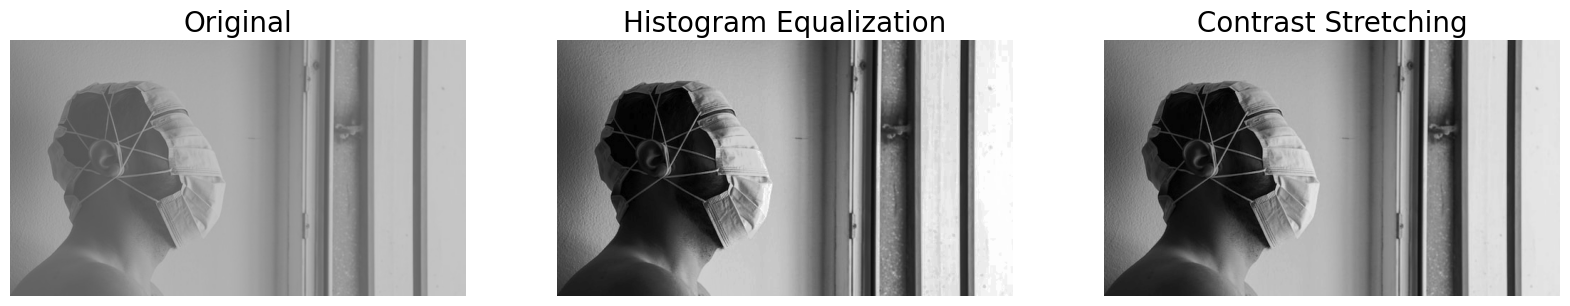

In [5]:
# 1d
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.imshow(mask)
plt.title("Original", fontsize=20)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_eq)
plt.title("Histogram Equalization", fontsize=20)
plt.axis('off')

plt.subplot(1,3,3); plt.imshow(mask_cs)
plt.title('Contrast Stretching', fontsize=20)
plt.axis("off")
plt.show()

Warna hitam pada histogram equalization lebih pekat dibandingkan dengan contrast stretching. Berdasarkan data pada histogram pada 1c dan 1b, contrast stretching tingkat keabuannya lebih merata dibandingkan dengan histogram equalization. Pada histogram equalization tingkat keabuannya lebih padat pada bagian kiri sehingga warna-warna gelap menjadi lebih pekat.

## Soal 2
### a. [10] Gunakan Sobel spatial filter dan Prewitt spatial filter untuk menemukan dan menampilkan horizontal edge dari citra tersebut

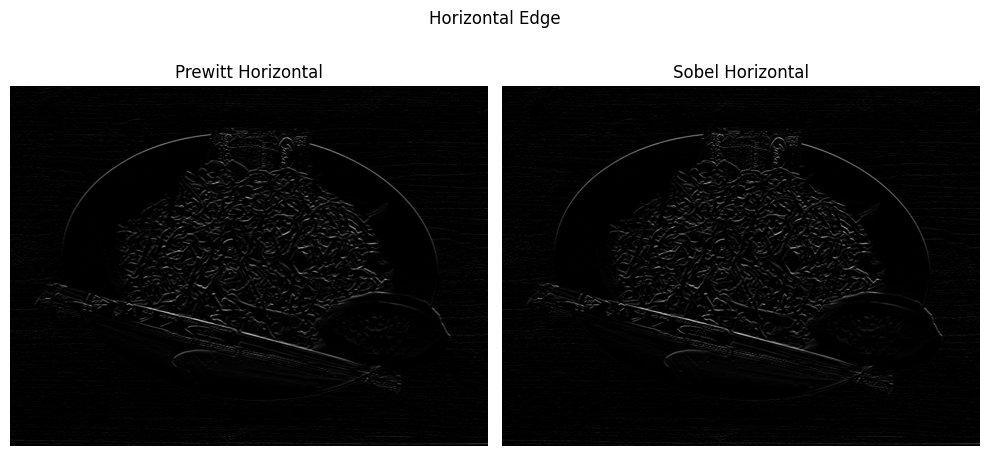

In [6]:
noodles = color.rgb2gray(io.imread("noodles.jpg"))

# 2a
plt.figure(figsize=(10,5))
plt.suptitle("Horizontal Edge")
noodles_prewitt_h = util.img_as_ubyte(filters.prewitt_h(noodles))
plt.subplot(1,2,1)
plt.imshow(noodles_prewitt_h, cmap='gray')
plt.title("Prewitt Horizontal")
plt.axis('off')

noodles_sobel_h = util.img_as_ubyte(filters.sobel_h(noodles))
plt.subplot(1,2,2)
plt.imshow(noodles_sobel_h, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title("Sobel Horizontal")
plt.show()

### b. [10] Gunakan Sobel spatial filter dan Prewitt spatial filter untuk menemukan dan menampilkan vertical edge dari citra tersebut

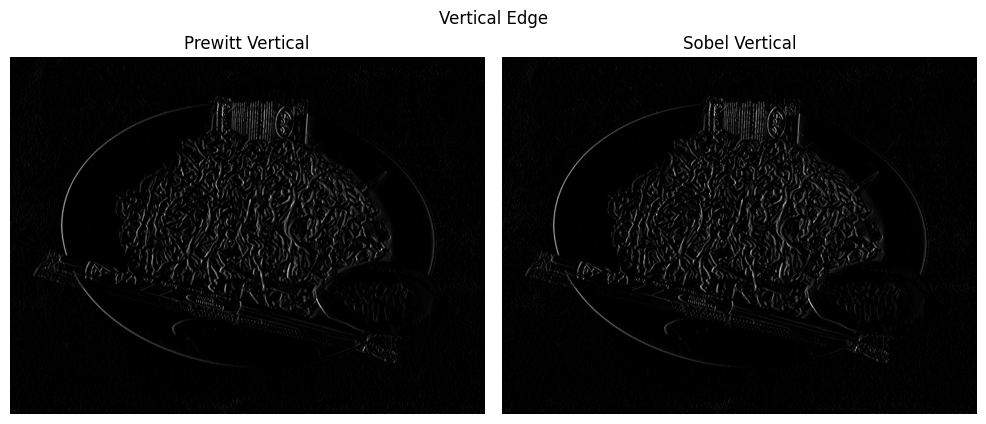

In [7]:
# 2b
plt.figure(figsize=(10,8))
plt.suptitle("Vertical Edge")
noodles_prewitt_v = util.img_as_ubyte(filters.prewitt_v(noodles))
plt.subplot(2,2,1)
plt.imshow(noodles_prewitt_v, cmap='gray')
plt.title("Prewitt Vertical")
plt.axis('off')

noodles_sobel_v = util.img_as_ubyte(filters.sobel_v(noodles))
plt.subplot(2,2,2)
plt.imshow(noodles_sobel_v, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title("Sobel Vertical")
plt.show()

### c. [10] Berdasarkan hasil 2a. dan 2b. temukan dan tampilkan edge keseluruhan dari citra tersebut

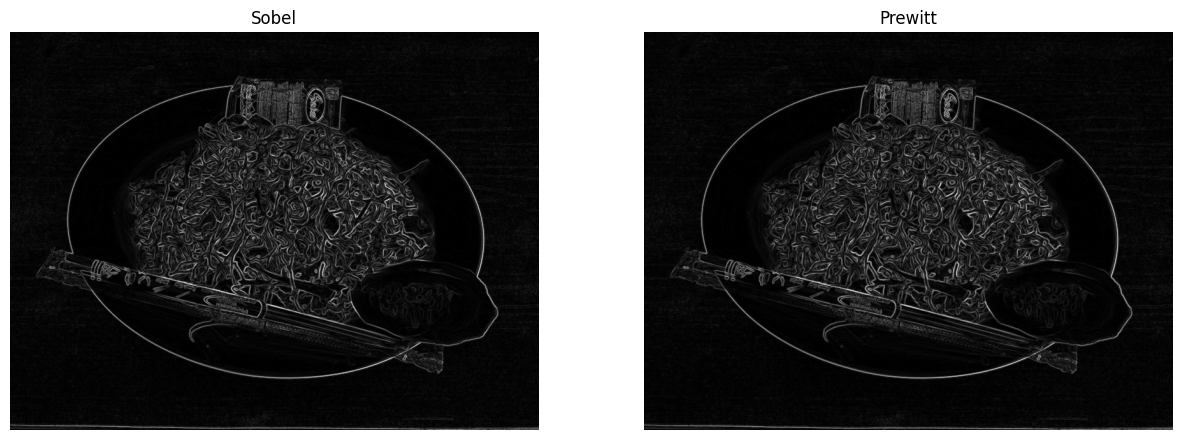

In [8]:
# 2c
noodles_sobel = util.img_as_ubyte(np.sqrt(np.square(filters.sobel_v(noodles)) + np.square(filters.sobel_h(noodles))))
noodles_prewitt = util.img_as_ubyte(np.sqrt(np.square(filters.prewitt_v(noodles)) + np.square(filters.prewitt_h(noodles))))

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Sobel")
plt.imshow(noodles_sobel, cmap="gray")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Prewitt")
plt.imshow(noodles_prewitt, cmap="gray")
plt.axis('off')
plt.show()

## Soal 3
### a. [7.5] Terapkan mean filter pada citra tersebut dengan ukuran kernel 3x3

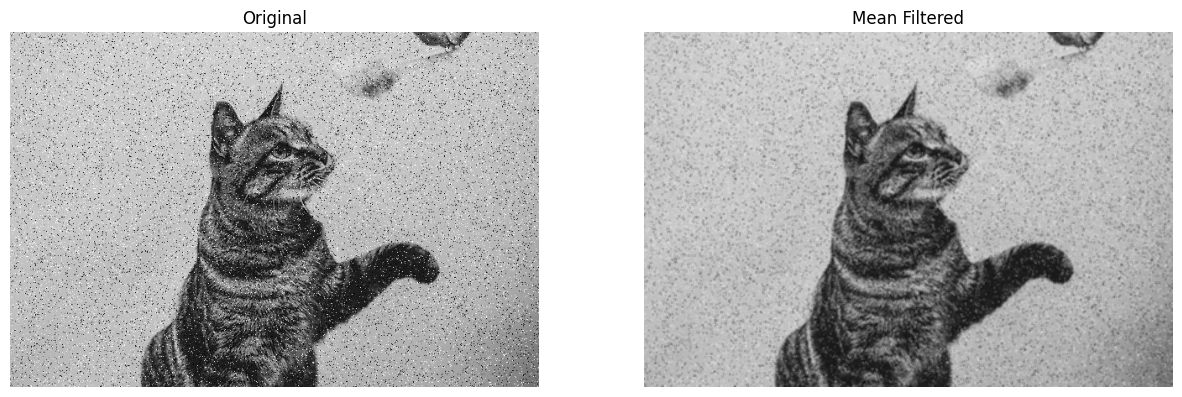

In [9]:
# 3a
cat = io.imread("cat.jpg")
cat_gray = color.rgb2gray(io.imread("cat.jpg"))
cat_mean = filters.rank.mean(cat_gray, footprint=morphology.square(3))

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(cat, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(cat_mean, cmap='gray', vmin=0, vmax=255)
plt.title("Mean Filtered")
plt.axis('off')
plt.show()

### b. [7.5] Terapkan median filter pada citra tersebut dengan ukuran kernel 3x3

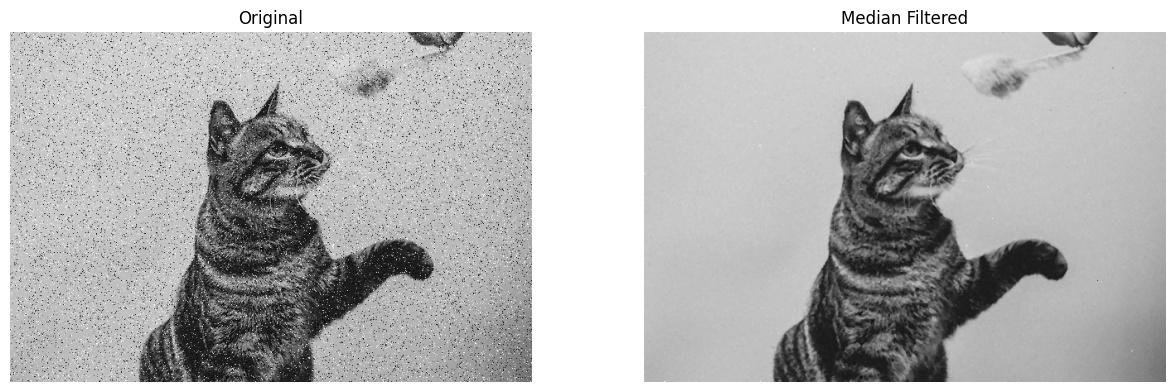

In [10]:
# 3b
cat_median = filters.rank.median(cat_gray, footprint=morphology.square(3))
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(cat, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original")

plt.subplot(2,2,2)
plt.imshow(cat_median, cmap='gray', vmin=0, vmax=255)
plt.title("Median Filtered")
plt.axis('off')
plt.show()

### c. [15] Ceritakan perbedaan citra yang dihasilkan pada soal 3a. dan 3b. Filter manakah yang hasilnya lebih baik menurut Anda? Berikan pula alasannya.

Hasil dari 3b lebih baik daripada hasil 3a. Mean filter dan median filter sama-sama digunakan untuk menghilangkan noise pada gambar. Namun, median filter melakukan tugasnya dengan lebih baik dibandingkan dengan mean filter. Karena nilai median sama dengan salah satu pixel yang ada pada gambar sehingga median filter tidak membuat pixel yang sebelumnya tidak ada pada gambar. Oleh karena itu, median filter lebih baik dalam mempertahankan edge.